In [ ]:
import sys
!{sys.executable} -m pip install multiscale-spatial-image matplotlib ipfsspec zarr

In [1]:
from multiscale_spatial_image import to_multiscale
import xarray as xr
import zarr
from ipfsspec import IPFSFileSystem 

Download an example dataset via the [Interplanetary Filesystem (IPFS)](https://ipfs.io/).

In [2]:
fs = IPFSFileSystem()
cid = "bafybeibpqky6d335duxtkmwowcc6igt2q5qorqd7e5xqfoxlfxm4pozg74"
store = fs.get_mapper(f"ipfs://{cid}/input/cthead1.zarr")

In [3]:
image_ds = xr.open_zarr(store)
image_ds

<xarray.Dataset>
Dimensions:  (y: 256, x: 256)
Coordinates:
  * x        (x) float64 0.0 1.0 2.0 3.0 4.0 ... 251.0 252.0 253.0 254.0 255.0
  * y        (y) float64 0.0 1.0 2.0 3.0 4.0 ... 251.0 252.0 253.0 254.0 255.0
Data variables:
    cthead1  (y, x) uint8 dask.array<chunksize=(64, 64), meta=np.ndarray>

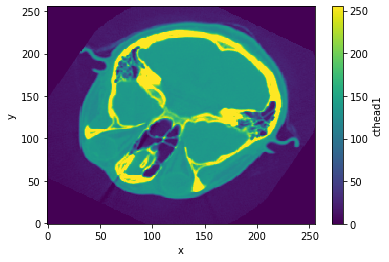

In [4]:
image = image_ds.cthead1
image.plot.imshow()

In [5]:
multiscale = to_multiscale(image, [2,4])

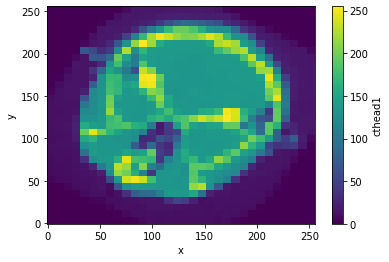

In [6]:
multiscale['scale2'].ds.cthead1.plot.imshow()

In [7]:
print(multiscale)

DataTree('multiscales', parent=None)
├── DataTree('scale0')
│   Dimensions:  (x: 256, y: 256)
│   Coordinates:
│     * x        (x) float64 0.0 1.0 2.0 3.0 4.0 ... 251.0 252.0 253.0 254.0 255.0
│     * y        (y) float64 0.0 1.0 2.0 3.0 4.0 ... 251.0 252.0 253.0 254.0 255.0
│   Data variables:
│       cthead1  (y, x) uint8 dask.array<chunksize=(256, 256), meta=np.ndarray>
├── DataTree('scale1')
│   Dimensions:  (x: 128, y: 128)
│   Coordinates:
│     * x        (x) float64 0.5 2.5 4.5 6.5 8.5 ... 246.5 248.5 250.5 252.5 254.5
│     * y        (y) float64 0.5 2.5 4.5 6.5 8.5 ... 246.5 248.5 250.5 252.5 254.5
│   Data variables:
│       cthead1  (y, x) uint8 dask.array<chunksize=(128, 128), meta=np.ndarray>
└── DataTree('scale2')
    Dimensions:  (x: 32, y: 32)
    Coordinates:
      * x        (x) float64 3.5 11.5 19.5 27.5 35.5 ... 227.5 235.5 243.5 251.5
      * y        (y) float64 3.5 11.5 19.5 27.5 35.5 ... 227.5 235.5 243.5 251.5
    Data variables:
        cthead1  (y, x) uint8

It is highly recommended to use `dimension_separator='/'` in the construction of Zarr stores.

This generates an [OME-NGFF](https://ngff.openmicroscopy.org/latest/) dataset.

In [8]:
store = zarr.storage.DirectoryStore('cthead1.zarr', dimension_separator='/')
multiscale.to_zarr(store)